## Initialization

In [1]:
import matplotlib   
import matplotlib.pyplot as plt
import cv2
from bs4 import BeautifulSoup

matplotlib.rcParams['figure.figsize'] = (15, 15)

In [2]:
!git clone https://github.com/muhd-umer/pyramidtabnet.git PyramidTabNet

Cloning into 'PyramidTabNet'...
remote: Enumerating objects: 965, done.
remote: Counting objects: 100% (452/452), done.
remote: Compressing objects: 100% (244/244), done.
remote: Total 965 (delta 243), reused 400 (delta 195), pack-reused 513
Receiving objects: 100% (965/965), 93.57 MiB | 34.71 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [3]:
%cd PyramidTabNet

/content/PyramidTabNet


In [4]:
%%capture
!pip install -r requirements.txt
!pip install -U openmim
!mim install mmcv-full==1.6.0

In [5]:
%%capture
!bash weights/get_weights.sh

## Evaluation (on ICDAR 2019)

In [7]:
%run model/test.py --config-file "model/config/ptn.py" \
                   --input "data/cTDaR/" \
                   --weights "weights/ptn_detection.pth" \
                   --device "cuda"

Model loaded successfully.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 240/240, 4.6 task/s, elapsed: 53s, ETA:     0s

╒═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│ Metric    │   IOU @ 6 │   IOU @ 7 │   IOU @ 8 │   IOU @ 9 │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Precision │    0.9781 │    0.9781 │    0.9716 │    0.9365 │
├───────────┼───────────┼───────────┼───────────┼───────────┤
│ Recall    │    0.9955 │    0.9955 │    0.9889 │    0.9532 │
├───────────┼───────────┼───────────┼───────────┼───────────┤
│ F1 Score  │    0.9868 │    0.9868 │    0.9801 │    0.9448 │
╘═══════════╧═══════════╧═══════════╧═══════════╧═══════════╛

Average Weighted F1: 0.9724

Writing results to output/results.pkl.


## Inference

In [8]:
from google.colab import files
_ = files.upload()

Saving eu-009_td.png to eu-009_td.png


### Table Detection

In [9]:
%run model/td.py --config-file "model/config/ptn.py" \
                 --input "eu-009_td.png" \
                 --output "output/" \
                 --device "cuda" \
                 --save

Model loaded successfully.
Results will be saved to /content/PyramidTabNet/output
Inference on eu-009_td.png completed.


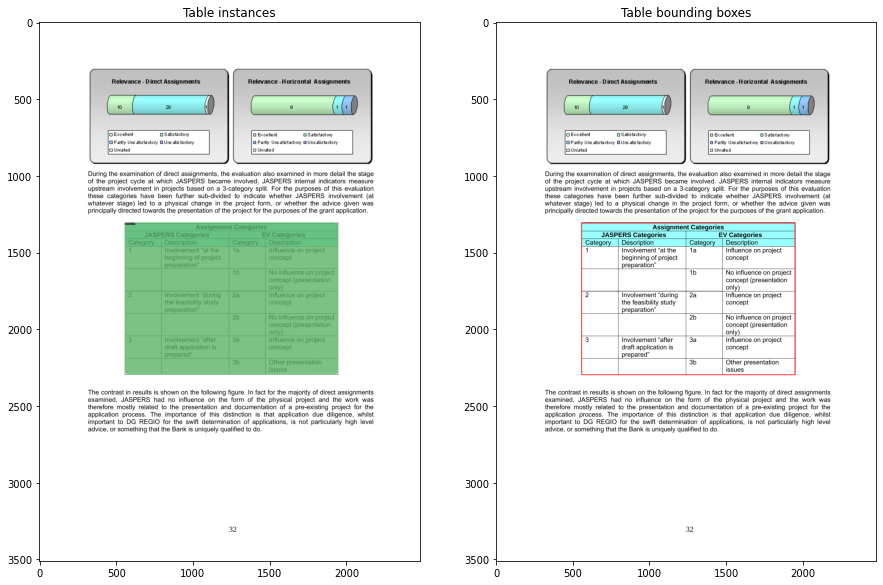

In [10]:
td_a = cv2.imread('/content/PyramidTabNet/output/eu-009_td/instance_detections.png', cv2.IMREAD_COLOR)
td_b = cv2.imread('/content/PyramidTabNet/output/eu-009_td/table_detections.png', cv2.IMREAD_COLOR)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Table instances')
ax1.imshow(td_a)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Table bounding boxes')
ax2.imshow(td_b)

### Table Structure Recognition

In [11]:
from google.colab import files
_ = files.upload()

Saving eu-009_tsr.png to eu-009_tsr.png


In [12]:
%run model/tsr.py --config-file "model/config/ptn.py" \
                  --input "eu-009_tsr.png" \
                  --output "output/" \
                  --device "cuda" \
                  --save

Models loaded successfully.
Results will be saved to /content/PyramidTabNet/output
Inference on eu-009_tsr.png completed.


<Figure size 1080x1080 with 0 Axes>

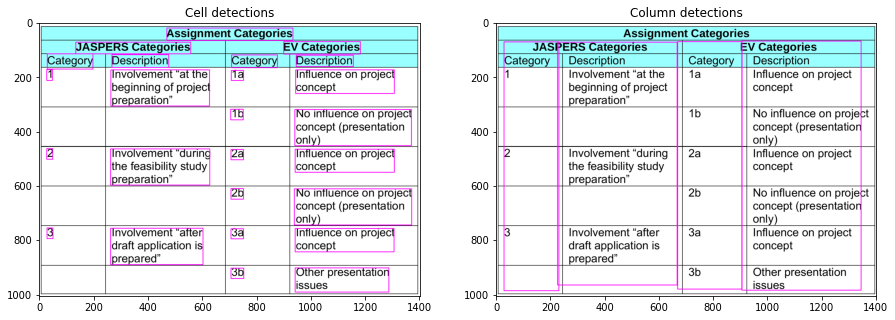

In [13]:
tsr_a = cv2.imread('/content/PyramidTabNet/output/eu-009_tsr/cell_detections.png', cv2.IMREAD_COLOR)
tsr_b = cv2.imread('/content/PyramidTabNet/output/eu-009_tsr/column_detections.png', cv2.IMREAD_COLOR)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Cell detections')
ax1.imshow(tsr_a)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Column detections')
ax2.imshow(tsr_b)

In [14]:
bs = BeautifulSoup(open('/content/PyramidTabNet/output/eu-009_tsr/table_structure.xml'), 'xml')
structure_xml = bs.prettify()
print(structure_xml)

<?xml version="1.0" encoding="utf-8"?>
<document>
 <cell end-col="2" end-row="2" start-col="2" start-row="2">
  <Coords points="706,609 706,648 752,648 752,609"/>
 </cell>
 <cell end-col="0" end-row="2" start-col="0" start-row="2">
  <Coords points="263,463 263,596 628,596 628,463"/>
 </cell>
 <cell end-col="2" end-row="3" start-col="2" start-row="3">
  <Coords points="706,902 706,940 753,940 753,902"/>
 </cell>
 <cell end-col="1" end-row="2" start-col="1" start-row="2">
  <Coords points="942,464 942,549 1307,549 1307,464"/>
 </cell>
 <cell end-col="1" end-row="3" start-col="1" start-row="3">
  <Coords points="942,901 942,990 1287,990 1287,901"/>
 </cell>
 <cell end-col="2" end-row="2" start-col="2" start-row="2">
  <Coords points="706,465 706,503 752,503 752,465"/>
 </cell>
 <cell end-col="1" end-row="2" start-col="1" start-row="2">
  <Coords points="939,610 939,743 1371,743 1371,610"/>
 </cell>
 <cell end-col="2" end-row="2" start-col="2" start-row="2">
  <Coords points="705,317 705,

### End-to-end

In [15]:
from google.colab import files
_ = files.upload()

Saving cTDaR_t10003.jpg to cTDaR_t10003.jpg


In [16]:
%run main.py --config-file "model/config/ptn.py" \
             --input "cTDaR_t10003.jpg" \
             --output "output/" \
             --device "cuda"

Models loaded successfully.
Results will be saved to /content/PyramidTabNet/output
Failed to fetch table structure.
Inference on cTDaR_t10003.jpg completed.


<Figure size 1080x1080 with 0 Axes>

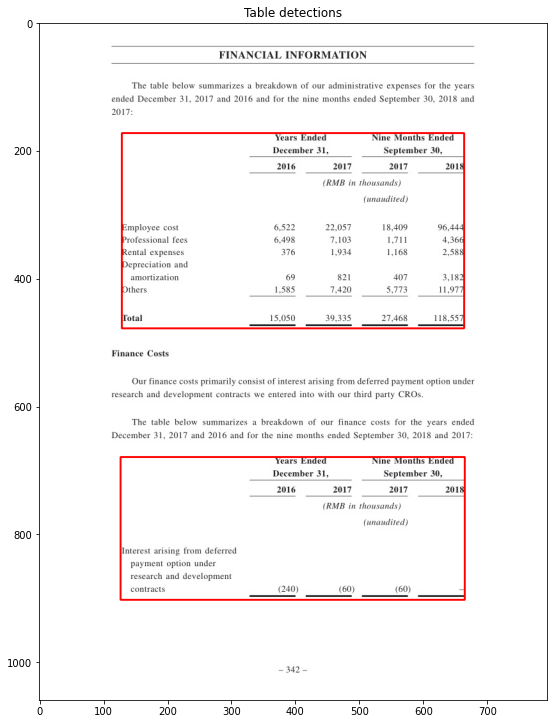

In [33]:
main_a = cv2.imread('/content/PyramidTabNet/output/cTDaR_t10003/table_detections.png', cv2.IMREAD_COLOR)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Table detections')
ax1.imshow(main_a)

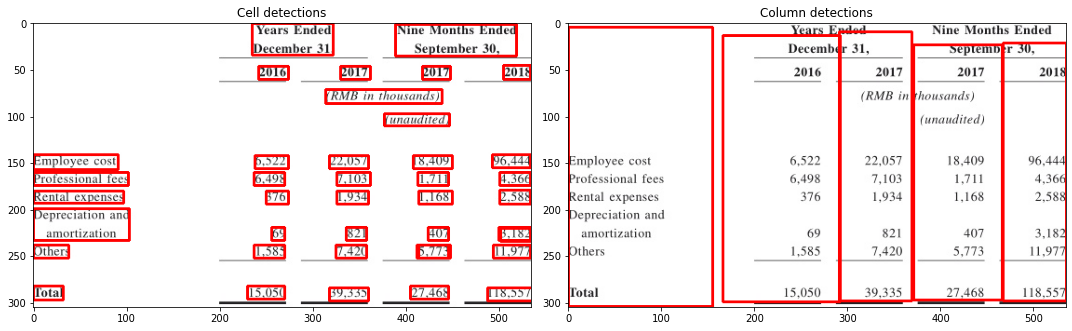

In [34]:
main_b = cv2.imread('/content/PyramidTabNet/output/cTDaR_t10003/table_0_cells.png', cv2.IMREAD_COLOR)
main_c = cv2.imread('/content/PyramidTabNet/output/cTDaR_t10003/table_0_columns.png', cv2.IMREAD_COLOR)

fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 1)
ax2.set_title('Cell detections')
ax2.imshow(main_b)
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title('Column detections')
ax3.imshow(main_c)

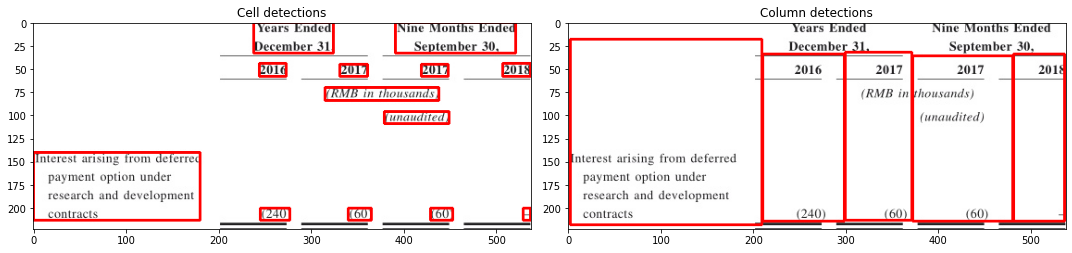

In [35]:
main_d = cv2.imread('/content/PyramidTabNet/output/cTDaR_t10003/table_1_cells.png', cv2.IMREAD_COLOR)
main_e = cv2.imread('/content/PyramidTabNet/output/cTDaR_t10003/table_1_columns.png', cv2.IMREAD_COLOR)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Cell detections')
ax1.imshow(main_d)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Column detections')
ax2.imshow(main_e)

In [36]:
bs = BeautifulSoup(open('/content/PyramidTabNet/output/cTDaR_t10003/structure.xml'), 'xml')
structure_xml = bs.prettify()
print(structure_xml)

<?xml version="1.0" encoding="utf-8"?>
<document>
 <table>
  <Coords points="129,173 664,478 664,478 664,173"/>
  <cell end-col="2" end-row="4" start-col="2" start-row="4">
   <Coords points="629,392 629,406 663,406 663,392"/>
  </cell>
  <cell end-col="3" end-row="4" start-col="3" start-row="4">
   <Coords points="454,411 454,425 487,425 487,411"/>
  </cell>
  <cell end-col="3" end-row="4" start-col="3" start-row="4">
   <Coords points="465,392 465,406 487,406 487,392"/>
  </cell>
  <cell end-col="1" end-row="4" start-col="1" start-row="4">
   <Coords points="541,411 541,425 575,425 575,411"/>
  </cell>
  <cell end-col="2" end-row="2" start-col="2" start-row="2">
   <Coords points="630,352 630,367 663,367 663,352"/>
  </cell>
  <cell end-col="1" end-row="1" start-col="1" start-row="1">
   <Coords points="542,333 542,347 575,347 575,333"/>
  </cell>
  <cell end-col="2" end-row="4" start-col="2" start-row="4">
   <Coords points="623,411 623,425 663,425 663,411"/>
  </cell>
  <cell end-c